Definição da FFT:
# $$x[k] \sum_{n=0}^{N-1} x[n]e^{\frac{-i2\pi{kn}}{N}}$$
De maneira que o sinal é dado por x[n], N é o tamanho do domínio.
Note que seguindo a definição, a implementação de um algorítimo teria de fazer N multiplicações x N somas = $O(N^2)$.

Por outro lado, a $Fast~Fourier~Transform$, transformada rápida de Fourier realiza a mesma operação em $O(N~Log_2~N)$.

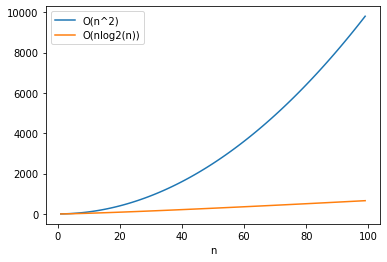

In [4]:
%matplotlib inline
import numpy as np
import math as ma
from matplotlib import pyplot as plt
step = np.arange(1,10**2)
o_n2 = lambda x: x**2
o_nlogn = lambda x: x* ma.log2(x)
on2 = np.array([o_n2(s) for s in step])
onlogn = np.array([o_nlogn(s) for s in step])

plt.xlabel('n')
plt.plot(step, on2, label='O(n^2)')
plt.plot(step, onlogn, label='O(nlog2(n))')
plt.legend(loc='best')
plt.show()

O $FFT$ se aproveita da seguinte propriedade:

### $$x[k] \sum_{n=0}^{N-1} x[n]e^{\frac{-i2\pi kn}{N}} = \sum_{r=1}^{\frac{N}{2}-1} x[2r]e^{\frac{-i2\pi k2r}{N}} + e^{\frac{-i2\pi k}{N}}\sum_{r=1}^{\frac{N}{2}-1} x[2r+1]e^{\frac{-i2\pi k(2r+1)}{N}}$$

In [15]:
import numpy as np

def dft(x):
    N = len(x)
    x = np.asarray(x, dtype=float)
    n = np.arange(N)
    k = n.reshape((N,1))
    M = np.exp(-2j * np.pi * k * n/N)
    return np.dot(M,x)

def fft(x):
    N = len(x)
    assert N%2 == 0, 'Deve ser uma potencia de 2'
    if N == 2: return dft(x)
    else:
        x = np.asarray(x, dtype=float)
        x_par = fft(x[::2])
        x_impar = fft(x[1::2])
        c = np.exp(-2j * np.pi * np.arange(N)/N)
        return np.concatenate([x_par + c[:int(N/2)] * x_impar,
                               x_par + c[int(N/2):] * x_impar])

Comparando se a implentação da DFT está correta:

In [7]:
sinal = np.random.random(256)
np.allclose(dft(sinal),np.fft.fft(sinal))

True

Comparando se a implentação da FFT está correta:

In [16]:
np.allclose(fft(sinal),np.fft.fft(sinal))

True

Eu comparei rodando a minha implementação no sinal e depois a implementação do numpy, e por fim comparei os resultados.
Uma curiosidade é que essa implementação ainda não é tão rápida quanto a do numpy, mesmo desconsiderando o fato de que o numpy tem sua implementação em C:

In [18]:
%timeit fft(sinal)

2.37 ms ± 71 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [21]:
%timeit np.fft.fft(sinal)

2.79 µs ± 85.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Mas ainda assim, a FFT aqui implementada é bem mais rápida que a DFT:

In [22]:
%timeit dft(sinal)

4.97 ms ± 213 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
